# Deep Lizard Tensorflow and Keras Tutorial

## Model for Clinic Stuff

### Data preparation

In [1]:
import numpy as np
from random import randint, seed
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

seed(42)

In [2]:
train_labels = []
train_samples = []

Example data Clinical

**Creating the Training Set**

In [3]:
# Did experience side effects
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
# Didn't experience side effects
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

Shuffle the set

In [4]:
train_labels = np.array(train_labels)
train_samples= np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

Standardize the data set

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

### Creating the Keras Sequential Model

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

2021-09-04 18:21:06.155703: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-04 18:21:06.155731: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="softmax")
])

2021-09-04 18:21:07.954659: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-04 18:21:07.954682: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-04 18:21:07.954701: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (omar-LabTop): /proc/driver/nvidia/version does not exist
2021-09-04 18:21:07.954881: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [10]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

2021-09-04 18:21:08.443160: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
189/189 - 1s - loss: 0.6837 - accuracy: 0.5376 - val_loss: 0.6757 - val_accuracy: 0.6095
Epoch 2/30
189/189 - 0s - loss: 0.6644 - accuracy: 0.6672 - val_loss: 0.6546 - val_accuracy: 0.6762
Epoch 3/30
189/189 - 0s - loss: 0.6438 - accuracy: 0.7254 - val_loss: 0.6336 - val_accuracy: 0.6857
Epoch 4/30
189/189 - 0s - loss: 0.6211 - accuracy: 0.7354 - val_loss: 0.6094 - val_accuracy: 0.7571
Epoch 5/30
189/189 - 0s - loss: 0.5951 - accuracy: 0.7704 - val_loss: 0.5819 - val_accuracy: 0.8000
Epoch 6/30
189/189 - 0s - loss: 0.5678 - accuracy: 0.7942 - val_loss: 0.5541 - val_accuracy: 0.8048
Epoch 7/30
189/189 - 0s - loss: 0.5394 - accuracy: 0.8101 - val_loss: 0.5236 - val_accuracy: 0.8238
Epoch 8/30
189/189 - 0s - loss: 0.5088 - accuracy: 0.8291 - val_loss: 0.4929 - val_accuracy: 0.8238
Epoch 9/30
189/189 - 0s - loss: 0.4794 - accuracy: 0.8476 - val_loss: 0.4632 - val_accuracy: 0.8571
Epoch 10/30
189/189 - 0s - loss: 0.4515 - accuracy: 0.8550 - val_loss: 0.4355 - val_accuracy: 0.8905

**Creating the Testing Set**

In [11]:
test_samples = []
test_labels  = []

In [12]:
# Did experience side effects
for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
# Didn't experience side effects
for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [13]:
test_labels = np.array(test_labels)
test_samples= np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [14]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

### Predict

In [15]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [16]:
for i in predictions:
    print(i)

[0.01782322 0.9821768 ]
[0.2707503 0.7292497]
[0.35312524 0.6468748 ]
[0.87702954 0.12297042]
[0.1045851  0.89541495]
[0.20160264 0.79839736]
[0.6636569  0.33634308]
[0.9555481  0.04445186]
[0.6636569  0.33634308]
[0.05787962 0.9421204 ]
[0.29685435 0.7031457 ]
[0.02075779 0.9792422 ]
[0.942691   0.05730896]
[0.18171006 0.8182899 ]
[0.09314863 0.90685135]
[0.02239756 0.9776024 ]
[0.57301044 0.42698956]
[0.95601237 0.04398766]
[0.9410938  0.05890623]
[0.35312524 0.6468748 ]
[0.9390391  0.06096089]
[0.05787962 0.9421204 ]
[0.950084   0.04991597]
[0.942691   0.05730896]
[0.9523305 0.0476695]
[0.09314863 0.90685135]
[0.9021716  0.09782845]
[0.082847 0.917153]
[0.6636569  0.33634308]
[0.082847 0.917153]
[0.63439935 0.36560065]
[0.22307919 0.7769208 ]
[0.95124704 0.04875301]
[0.9555481  0.04445186]
[0.02416365 0.97583634]
[0.01651269 0.9834873 ]
[0.9021716  0.09782845]
[0.05787962 0.9421204 ]
[0.9564719 0.0435281]
[0.7673876  0.23261236]
[0.89023    0.10976996]
[0.69171077 0.30828926]
[0.353

In [17]:
# Tell me the column if the pacient experienced side-effects
rounded_predicitons = np.argmax(predictions, axis=1)

In [18]:
for i in rounded_predicitons:
    print(i)

1
1
1
0
1
1
0
0
0
1
1
1
0
1
1
1
0
0
0
1
0
1
0
0
0
1
0
1
0
1
0
1
0
0
1
1
0
1
0
0
0
0
1
1
1
0
0
1
1
1
0
0
0
1
1
0
1
0
1
0
1
0
0
0
1
1
1
0
1
0
0
0
1
0
1
1
0
1
1
1
1
1
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
1
1
0
1
1
1
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
0
1
0
1
1
1
0
1
0
0
0
0
1
1
1
0
1
1
0
0
0
1
0
1
0
0
0
0
1
1
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
1
1
0
0
0
1
1
0
1
1
1
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
1
1
0
1
1
1
1
1
0
1
1
0
0
1
0
0
0
1
1
0
1
0
1
1
0
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
0
0
0
1
0
0
0
0
0
1
1
1
1
1
0
0
0
0
0
1
1
1
0
0
0
0
0
1
1
1
0
1
1
1
1
1
0
0
0
0
0
1
0
1
1
1
1
0
1
0
0
0
0
0
1
1
0
1
0
1
1
1
1
0
0
1
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
0
0
1
0
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
0
0
1
0
0
0
1
0
0
1
1
1
0
0
0
1
1
0
1
1
1
0
0
1
0
1
0
1
0
0
0
1
0
1
1
0
1
1
0
1
1
1
0
1
0
1
1
1
0
1
0
1
1
1
1
0
1
1
0
1
1
1
1
1
1
0
0
0
0
0
1
1
0


### Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predicitons)

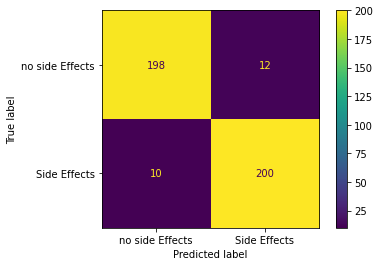

In [21]:
cm_plot_labels = ["no side Effects", "Side Effects"]
result = ConfusionMatrixDisplay(cm, display_labels=cm_plot_labels)
result.plot()

### Saving the Model

In [22]:
import os.path
PATH = "models/medical_trail_model.h5"
if (os.path.isfile(PATH) is False):
    model.save(PATH)

In [23]:
from tensorflow.keras.models import load_model
new_model = load_model(PATH)
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [24]:
WEIGHTS_PATH = "models/medical_model_weights.h5"
if( os.path.isfile(WEIGHTS_PATH) is False):
    model.save_weights(WEIGHTS_PATH)

In [25]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="softmax")
])

In [26]:
model2.load_weights(WEIGHTS_PATH)
model2.get_weights()

[array([[-0.53635794, -0.57288027,  0.3524174 , -0.02922803, -0.05655712,
          0.3204777 ,  0.22067283, -0.10177654, -0.19851175, -0.53664005,
         -0.16388631,  0.52816135, -0.2680879 , -0.11757903,  0.552567  ,
         -0.10425583]], dtype=float32),
 array([ 0.        ,  0.        , -0.10747033,  0.        ,  0.        ,
        -0.07314882, -0.07503791,  0.        ,  0.        ,  0.        ,
         0.        , -0.10948367,  0.        ,  0.2446161 , -0.07922095,
         0.        ], dtype=float32),
 array([[-2.64351666e-02,  1.46786660e-01,  2.62146741e-01,
          3.00918728e-01,  8.34930837e-02, -7.22000003e-02,
         -2.05530286e-01,  3.07723075e-01, -1.89480841e-01,
         -2.69365132e-01,  2.70890266e-01,  2.34569699e-01,
          3.10582846e-01,  3.76880169e-04, -2.86998272e-01,
         -2.98298359e-01,  2.46470720e-01, -2.08603129e-01,
          2.93779939e-01,  3.06399435e-01,  2.13802010e-01,
          3.12122256e-01,  1.85252279e-01,  9.08491313e-02,
 